# <span style="color:red"> NSL Esercitazione 2 </span>
### <span style="color:pink">  Giacomo Boringhieri 13457A</span>

## <span style="color:blue">  Esercizio 2.1</span>

In questo esercizio l'obiettivo è calcolare numericamente l'integrale

$$
I = \int_0^1 \frac{\pi}{2} \cos\left(\frac{\pi}{2} x\right) dx = 1
$$

utilizzando due approcci Monte Carlo e confrontandone l'efficienza.

### 1. Metodo della Media

Il metodo più semplice consiste nel generare \(N\) punti casuali $x_i$ uniformemente distribuiti nell'intervallo $[0,1]$ e stimare l'integrale come media dei valori della funzione:

$$
I \approx \frac{1}{N} \sum_{i=1}^{N} f(x_i).
$$

Questo approccio è facile da implementare e non richiede alcuna conoscenza preliminare della funzione $f(x)$. Tuttavia, può essere poco efficiente quando $f(x)$ è significativa solo in alcune regioni dell'intervallo: molti punti contribuiranno poco alla stima e aumenteranno solo il rumore statistico.

### 2. Importance Sampling

Per migliorare la precisione della stima, si può campionare i punti secondo una distribuzione $p(x)$ che imiti la forma di $f(x)$. In questo caso, l'integrale si riscrive come

$$
I = \int f(x) dx = \int \frac{f(x)}{p(x)} p(x) dx.
$$

In questo modo si concentra la generazione dei punti nelle zone dove $f(x)$ ha valori maggiori, riducendo la varianza della stima e aumentando l'efficienza del metodo rispetto al campionamento uniforme.

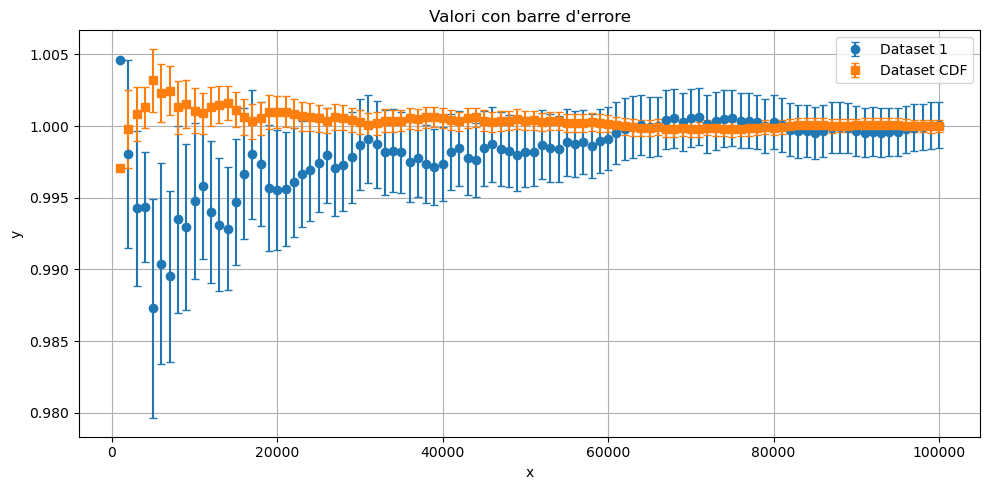

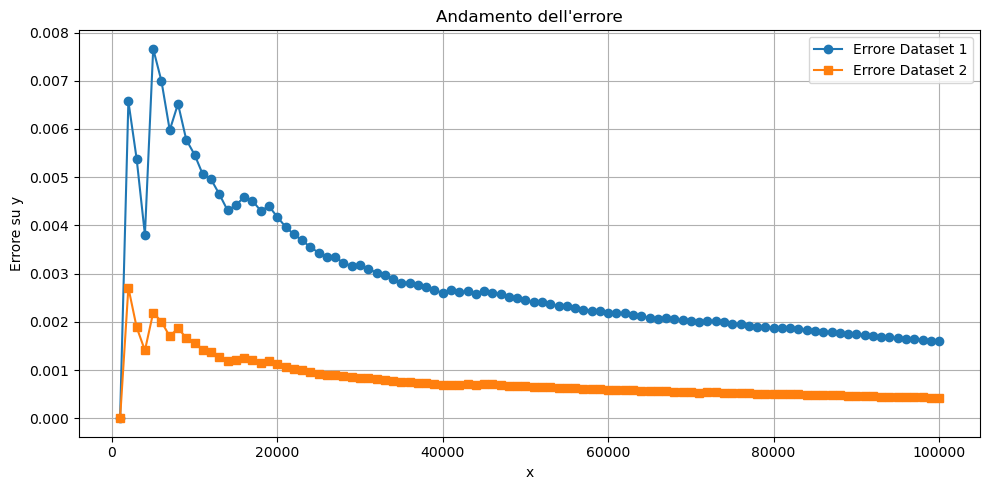

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Carica i dati
data1 = np.loadtxt("es1/data_2_1.dat")
data2 = np.loadtxt("es1/data_2_1_CDF.dat")

# Colonne: x, y, erry
x1, y1, err1 = data1[:,0], data1[:,1], data1[:,2]
x2, y2, err2 = data2[:,0], data2[:,1], data2[:,2]

# --- Grafico dei valori ---
plt.figure(figsize=(10,5))
plt.errorbar(x1, y1, yerr=err1, fmt="o", capsize=3, label="Dataset 1")
plt.errorbar(x2, y2, yerr=err2, fmt="s", capsize=3, label="Dataset CDF")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Valori con barre d'errore")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Grafico degli errori ---
plt.figure(figsize=(10,5))
plt.plot(x1, err1, "o-", label="Errore Dataset 1")
plt.plot(x2, err2, "s-", label="Errore Dataset 2")
plt.xlabel("x")
plt.ylabel("Errore su y")
plt.title("Andamento dell'errore")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## <span style="color:blue">  Esercizio 2.1</span>

Il Random Walk è un modello matematico che descrive un percorso formato da una sequenza di passi casuali.  
Si tratta di un esempio di catena di Markov: la posizione successiva dipende solo dalla posizione attuale e non dalla storia precedente del cammino.

In questo esercizio ho simulato il random walk partendo sempre dall'origine, considerando due scenari distinti:

- **Random walk su reticolo cubico**: ad ogni passo, il camminatore si sposta avanti o indietro di lunghezza \(a = 1\) lungo una delle tre direzioni principali $(x, y, z)$. La direzione e il verso del passo vengono determinati casualmente.

- **Random walk nel continuo**: ad ogni passo, il camminatore si muove di una distanza \(a = 1\) in una direzione scelta uniformemente nello spazio tridimensionale. La direzione è generata campionando uniformemente l’angolo solido: $\phi \in [0, 2\pi]$ e $\theta \in [0, \pi]$, tenendo conto del Jacobiano della trasformazione sferica.

Ho effettuato $M = 10^4$ simulazioni, ciascuna composta da $n = 100$ passi. Ho suddiviso i lanci in $N = 100$ blocchi e ho calcolato la radice della distanza quadratica media

$$
\sqrt{\langle |\vec{r}_i|^2 \rangle}
$$

per ciascun passo, sia per il random walk su reticolo che per quello continuo.

I risultati sono stati rappresentati graficamente e confrontati con la funzione teorica

$$
f(N) = k\sqrt{N},
$$

per verificare se entrambi i modelli seguono un comportamento di tipo diffusivo.

Nei grafici ho plottato il valore della distanza dall'origine e l'errore, in funzione del passo

k = 0.92548


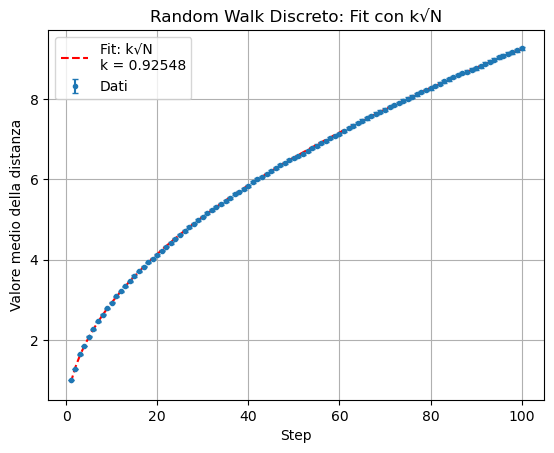

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Carica i dati dal file
data = np.loadtxt("es2/data.dat")

# Estrai le colonne
x = data[:, 0]   # Numero di step
y = data[:, 1]   # Valore medio della distanza
err = data[:, 2] # Errore

# Trasformazione: invece di f(N) = k√N, facciamo un fit lineare su (√N, y)
sqrt_x = np.sqrt(x)

# Fit lineare su (√N, y)
k_fit, intercept = np.polyfit(sqrt_x, y, 1)

print(f"k = {k_fit:.5f}")

# Crea il grafico con barre d'errore
plt.errorbar(x, y, yerr=err, fmt=".", label="Dati", capsize=2)

# Grafico della funzione di fit
x_fit = np.linspace(min(x), max(x), 100)  # Genera punti per la curva del fit
y_fit = k_fit * np.sqrt(x_fit)  # Usa la funzione f(N) = k√N con il k trovato

plt.plot(x_fit, y_fit, "r--", label=f"Fit: k√N\nk = {k_fit:.5f}")

# Opzioni di visualizzazione
plt.xlabel("Step")
plt.ylabel(r"Valore medio della distanza")
plt.title("Random Walk Discreto: Fit con k√N")
plt.legend()
plt.grid()

# Mostra il grafico
plt.show()

k = 0.91428


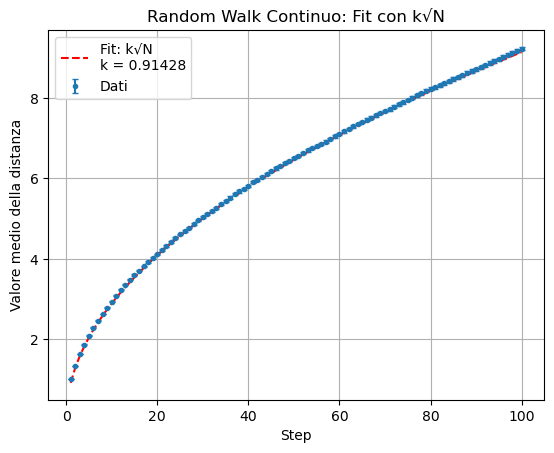

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Carica i dati dal file
data = np.loadtxt("es2/data_c.dat")

# Estrai le colonne
x = data[:, 0]   # Numero di step
y = data[:, 1]   # Valore medio della distanza
err = data[:, 2] # Errore

# Trasformazione: invece di f(N) = k√N, facciamo un fit lineare su (√N, y)
sqrt_x = np.sqrt(x)

# Fit lineare su (√N, y)
k_fit, intercept = np.polyfit(sqrt_x, y, 1)

print(f"k = {k_fit:.5f}")

# Crea il grafico con barre d'errore
plt.errorbar(x, y, yerr=err, fmt=".", label="Dati", capsize=2)

# Grafico della funzione di fit
x_fit = np.linspace(min(x), max(x), 100)  # Genera punti per la curva del fit
y_fit = k_fit * np.sqrt(x_fit)  # Usa la funzione f(N) = k√N con il k trovato

plt.plot(x_fit, y_fit, "r--", label=f"Fit: k√N\nk = {k_fit:.5f}")

# Opzioni di visualizzazione
plt.xlabel("Step")
plt.ylabel(r"Valore medio della distanza")
plt.title("Random Walk Continuo: Fit con k√N")
plt.legend()
plt.grid()

# Mostra il grafico
plt.show()

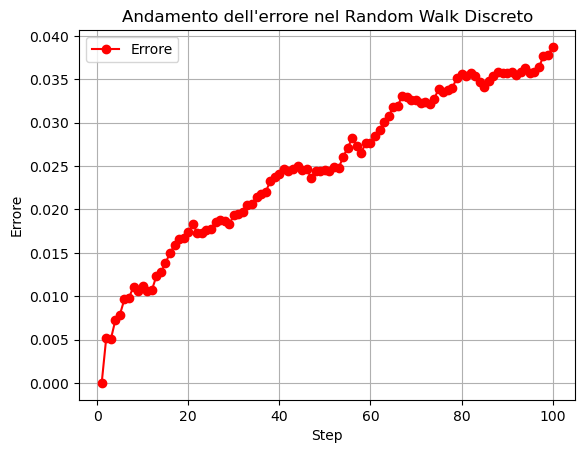

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Carica i dati dal file
data = np.loadtxt("es2/data.dat")

# Estrai le colonne
x = data[:, 0]   # Numero di step
err = data[:, 2] # Errore

# Crea il grafico dell'errore
plt.plot(x, err, 'r-o', label="Errore")
plt.xlabel("Step")
plt.ylabel("Errore")
plt.title("Andamento dell'errore nel Random Walk Discreto")
plt.grid(True)
plt.legend()
plt.show()

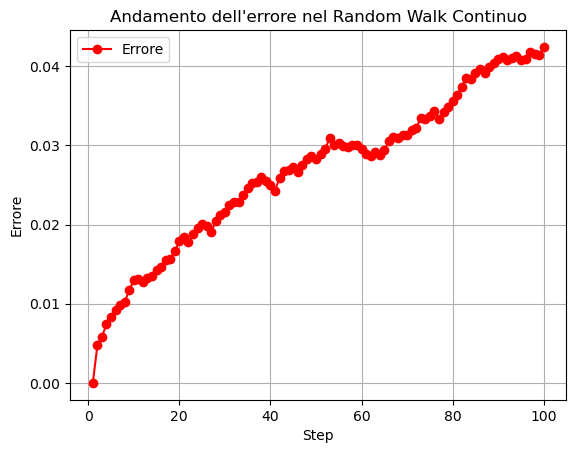

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Carica i dati dal file
data = np.loadtxt("es2/data_c.dat")

# Estrai le colonne
x = data[:, 0]   # Numero di step
err = data[:, 2] # Errore

# Crea il grafico dell'errore
plt.plot(x, err, 'r-o', label="Errore")
plt.xlabel("Step")
plt.ylabel("Errore")
plt.title("Andamento dell'errore nel Random Walk Continuo")
plt.grid(True)
plt.legend()
plt.show()